In [1]:
import importlib

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import gym_trading

In [2]:
fname = "~/Downloads/archive/btcusd.csv"
df = pd.read_csv(fname)
df.time = pd.to_datetime(df.time, unit="ms")
df.set_index("time", inplace=True)

In [3]:
importlib.reload(gym_trading)
env = gym_trading.envs.TradingEnv2(df["2014":], max_episode_steps=500, window_size=20)

/Users/a1/anaconda3/envs/datascience_py38/lib/python3.8/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment gym_trading/Trading-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [5]:
env.get_max_profit()

8.125605329401441

6.952686606524767 1.9391283369708034


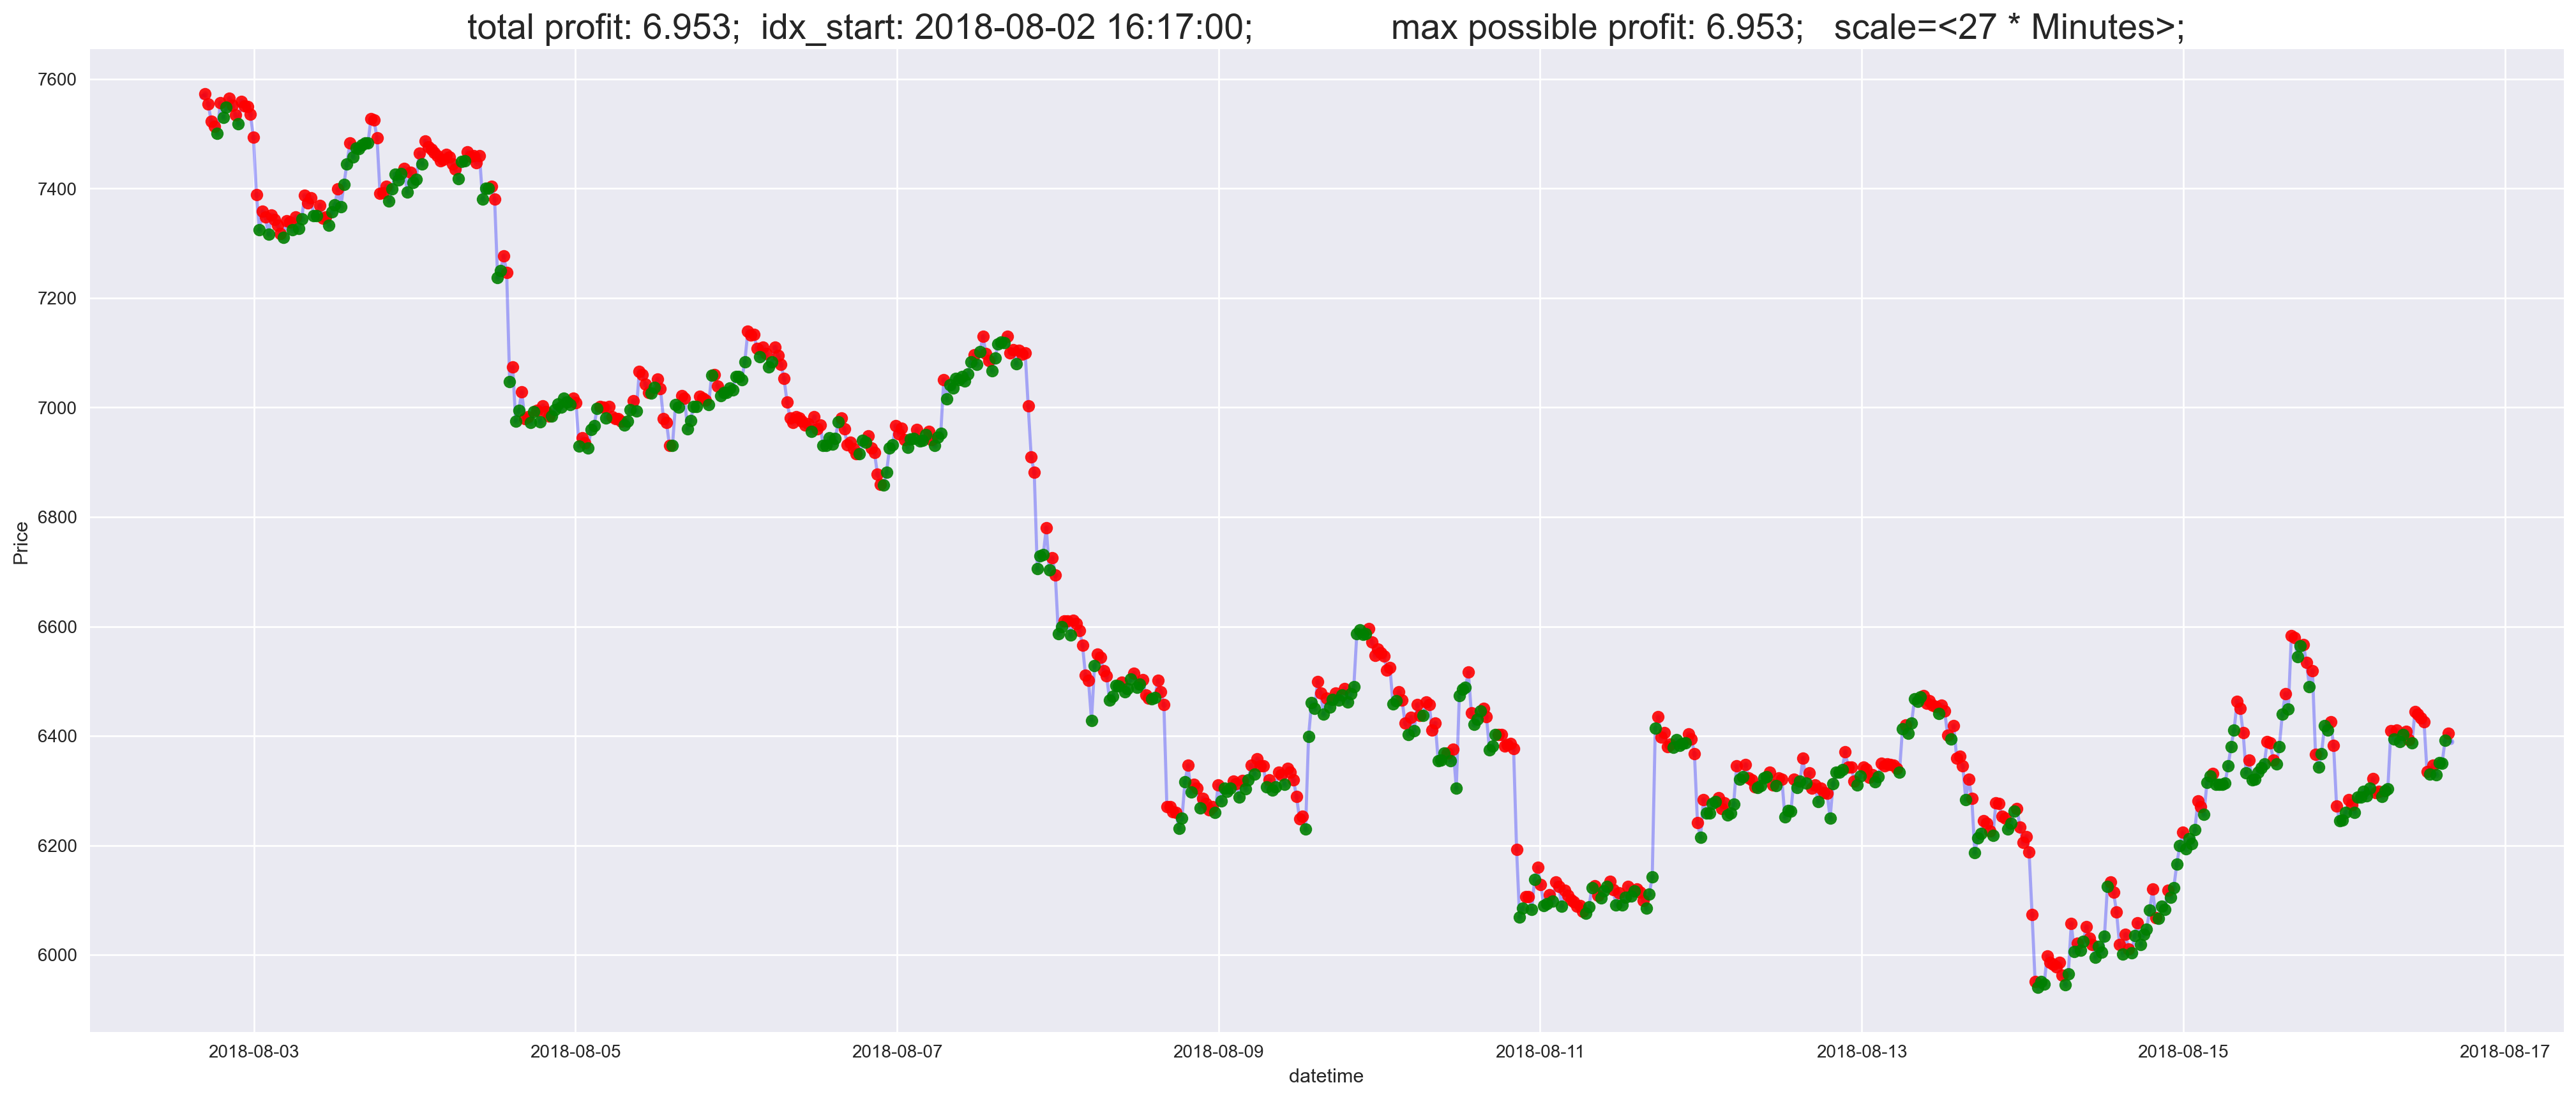

In [12]:
env.max_episode_steps = "14D"
obs, _ = env.reset()
done = False
while not done:
    # action = env.action_space.sample()
    action = env.get_optimal_action()
    obs, _, done, _, _ = env.step(action)
print(env.total_profit, env.total_reward)
env.render()

In [50]:
features = env.signal_features.loc[env.start_idx:env.end_idx].values
print(features[features != 0].std())
print(features.std())

0.007335435769951515
0.007247111748460603


In [47]:
print(env.prices.index.freq)
print(env.end_idx - env.start_idx)

<12 * Minutes>
4 days 04:00:00


In [24]:
volat = []
for i in range(1000):
    env.reset()
    features = env.signal_features.loc[env.start_idx:env.end_idx].values
    std = features[features != 0].std()
    if not np.isnan(std):
        volat.append(std)
print(f"{np.mean(volat):.4f} ± {np.std(volat):.4f}")

/Users/a1/anaconda3/envs/datascience_py38/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/a1/anaconda3/envs/datascience_py38/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/a1/anaconda3/envs/datascience_py38/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.0020 ± 0.0012


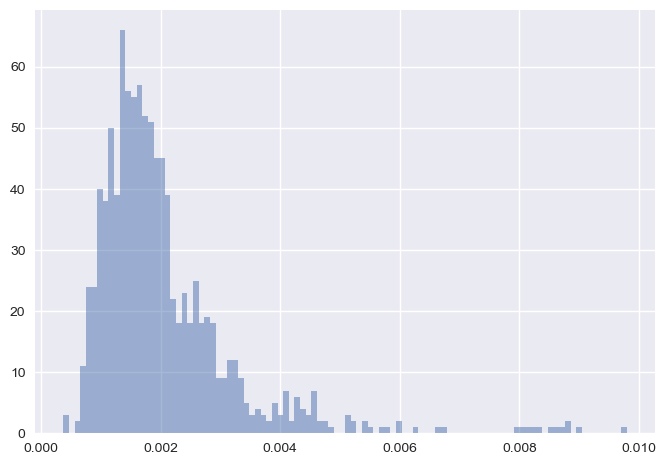

In [39]:
plt.hist(volat, bins=100, alpha=0.5)
plt.show()